In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, join, Column
import re
from tqdm.notebook import tqdm
from scikitplot.metrics import plot_confusion_matrix
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
IB_filters = [
    'TU_FNU_IB427_SUBARU',
    'TU_FNU_IB464_SUBARU',
    'TU_FNU_IB484_SUBARU',
    'TU_FNU_IB505_SUBARU',
    'TU_FNU_IB527_SUBARU',
    'TU_FNU_IB574_SUBARU',
    'TU_FNU_IB624_SUBARU',
    'TU_FNU_IB679_SUBARU',
    'TU_FNU_IB709_SUBARU',
    'TU_FNU_IB738_SUBARU',
    'TU_FNU_IB767_SUBARU',
    'TU_FNU_IB827_SUBARU',
]

In [3]:
true_photo = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/GalaxyIB.fits', hdu=1)

In [4]:
test_table = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/data/Result.fits')

In [5]:
def plot_bands(catalog):
    ncols = 2
    nrows = len(IB_filters) // 2

    fig, axes = plt.subplots(ncols=2, nrows=nrows, figsize=(20, 20))
    for f, ax in zip(IB_filters, axes.ravel()):
        g0 = catalog[f] > 0
        
        ax.set_title(f)
        ratio = (catalog[f + '_MEAN'] / catalog[f])
              
        good = catalog['AlternativeWeightFlag'] == 0
        mean_all = np.nanmean(ratio)
        std_all = np.nanstd(ratio)
        mean_good = np.nanmean(ratio[good])
        std_good = np.nanstd(ratio[good])
                
        ax.scatter(catalog[f][g0], ratio[g0], marker='1', alpha=0.4,
                   label=f'All {len(catalog)} ($\mu$ {mean_all:.2f}, $\sigma$ {std_all:.2f})')
        ax.scatter(catalog[f][good & g0], ratio[good & g0], marker='.',
                   label=f'Not flagged {good.sum()} ($\mu$ {mean_good:.2f}, $\sigma$ {std_good:.2f})')
        ax.axhline(1, linestyle='--', color='red')
        
        ax.set_xlabel('uJy')
        ax.set_ylabel('$\\dfrac{F_\mu}{F}$')
        ax.set_xscale('log')
        ax.set_ylim(-0.5, 2.5)

        ax.legend()
    plt.tight_layout()

# NNPZ with Combined (Euclidean + Chi2)

In [6]:
combined_matched = join(true_photo, test_table, 'OBJECT_ID')

<ipython-input-5-3cd4aeedafef>:10: RuntimeWarning: invalid value encountered in true_divide
  ratio = (catalog[f + '_MEAN'] / catalog[f])
<ipython-input-5-3cd4aeedafef>:13: RuntimeWarning: Mean of empty slice
  mean_all = np.nanmean(ratio)
/home/aalvarez/miniconda3/envs/phz/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
<ipython-input-5-3cd4aeedafef>:15: RuntimeWarning: Mean of empty slice
  mean_good = np.nanmean(ratio[good])


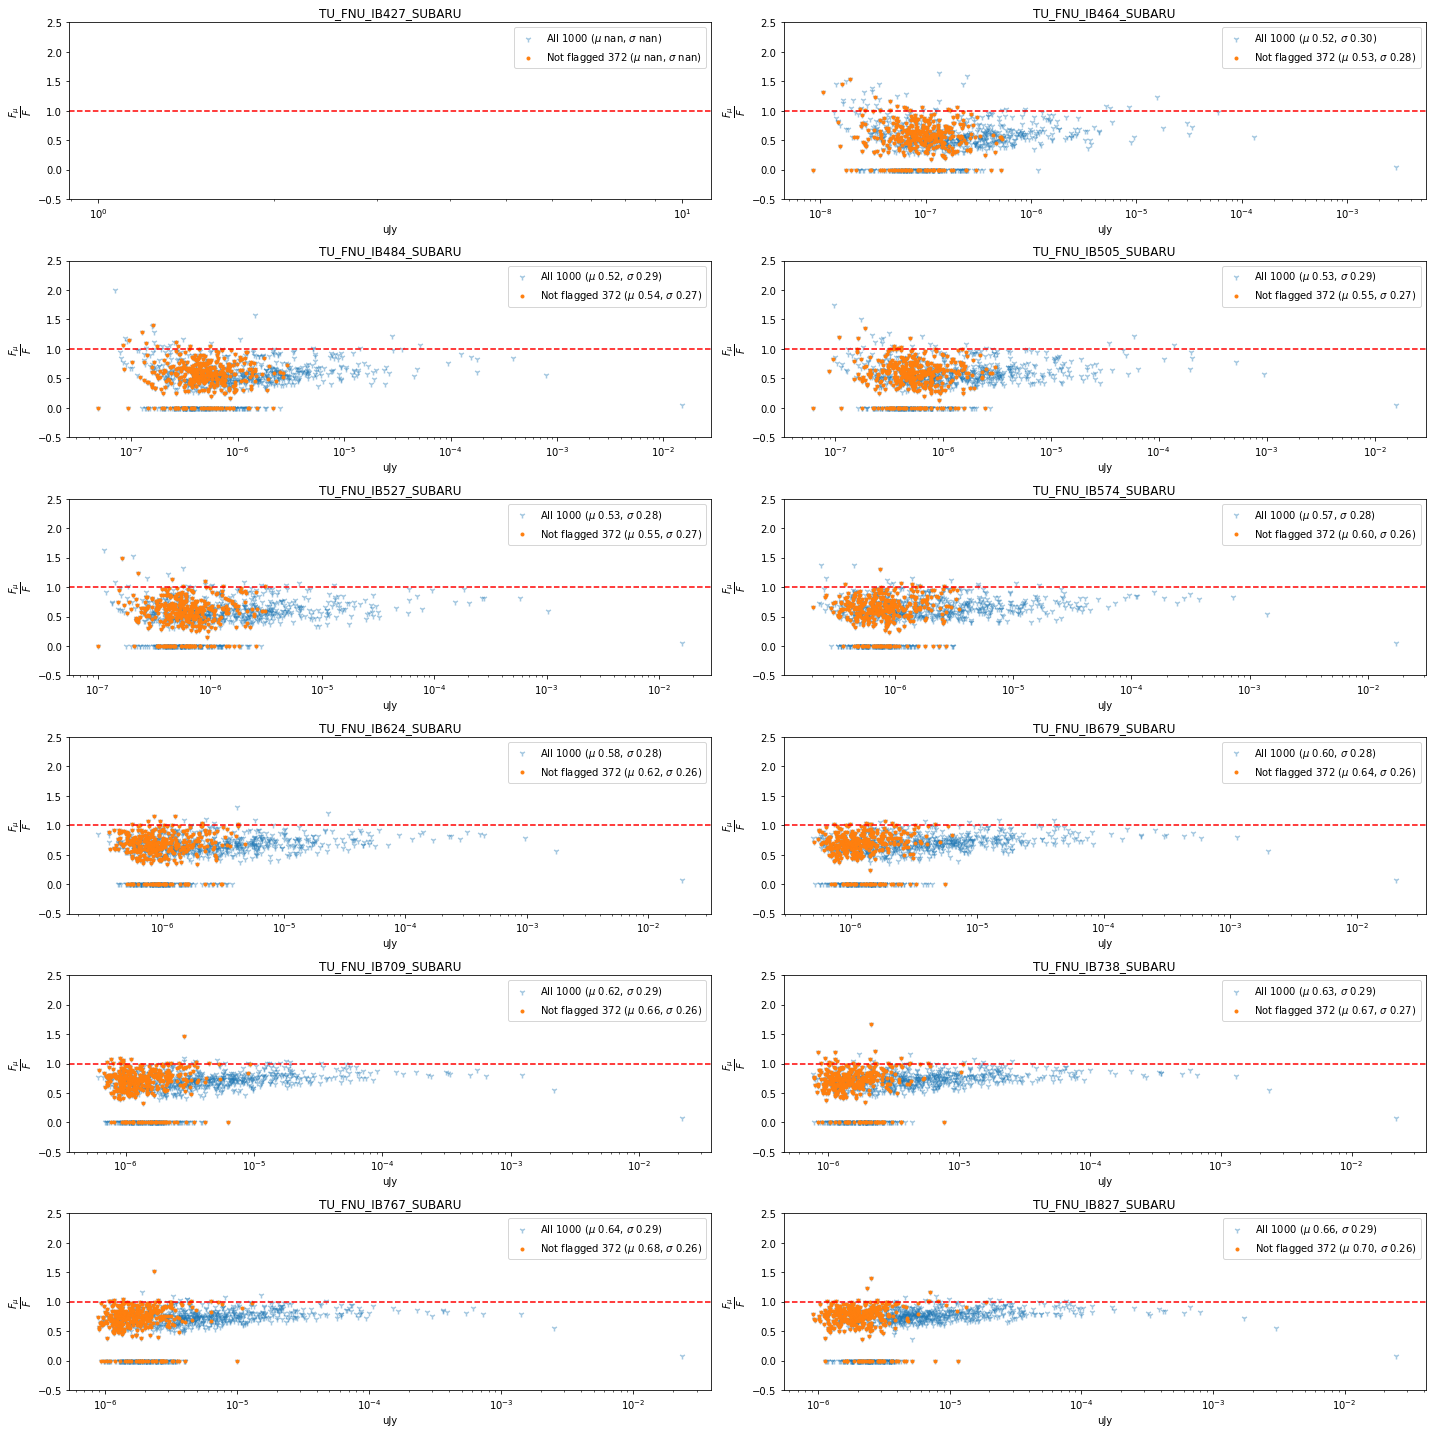

In [7]:
plot_bands(combined_matched)

In [11]:
test_table

OBJECT_ID,NEIGHBOR_IDS [30],NEIGHBOR_WEIGHTS [30],NEIGHBOR_SCALING [30],REDSHIFT_PDF [601],REDSHIFT_MEDIAN,AlternativeWeightFlag,lsst/u_MEAN,lsst/u_MEAN_ERR,lsst/g_MEAN,lsst/g_MEAN_ERR,lsst/r_MEAN,lsst/r_MEAN_ERR,lsst/i_MEAN,lsst/i_MEAN_ERR,lsst/z_MEAN,lsst/z_MEAN_ERR,euclid/VIS_MEAN,euclid/VIS_MEAN_ERR,euclid/Y_MEAN,euclid/Y_MEAN_ERR,euclid/J_MEAN,euclid/J_MEAN_ERR,euclid/H_MEAN,euclid/H_MEAN_ERR,TU_FNU_IB427_SUBARU_MEAN,TU_FNU_IB427_SUBARU_MEAN_ERR,TU_FNU_IB464_SUBARU_MEAN,TU_FNU_IB464_SUBARU_MEAN_ERR,TU_FNU_IB484_SUBARU_MEAN,TU_FNU_IB484_SUBARU_MEAN_ERR,TU_FNU_IB505_SUBARU_MEAN,TU_FNU_IB505_SUBARU_MEAN_ERR,TU_FNU_IB527_SUBARU_MEAN,TU_FNU_IB527_SUBARU_MEAN_ERR,TU_FNU_IB574_SUBARU_MEAN,TU_FNU_IB574_SUBARU_MEAN_ERR,TU_FNU_IB624_SUBARU_MEAN,TU_FNU_IB624_SUBARU_MEAN_ERR,TU_FNU_IB679_SUBARU_MEAN,TU_FNU_IB679_SUBARU_MEAN_ERR,TU_FNU_IB709_SUBARU_MEAN,TU_FNU_IB709_SUBARU_MEAN_ERR,TU_FNU_IB738_SUBARU_MEAN,TU_FNU_IB738_SUBARU_MEAN_ERR,TU_FNU_IB767_SUBARU_MEAN,TU_FNU_IB767_SUBARU_MEAN_ERR,TU_FNU_IB827_SUBARU_MEAN,TU_FNU_IB827_SUBARU_MEAN_ERR
int64,int64,float64,float64,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1818071398400000,1293091384090001 .. 1388125216340000,0.0001503246255885543 .. 6.458664045525508e-05,1.0 .. 1.0,0.0 .. 0.0,0.36598158,True,0.36893475,0.0,1.6435359,0.0,5.7408276,0.0,9.580856,0.0,12.37175,0.0,7.9576154,0.0,16.861084,0.0,22.741835,0.0,26.161535,0.0,0.0,0.0,2.5427582e-07,0.0,1.4001739e-06,0.0,1.7515008e-06,0.0,2.0363702e-06,0.0,3.7873995e-06,0.0,5.59345e-06,0.0,7.0767665e-06,0.0,7.616718e-06,0.0,8.552395e-06,0.0,9.6500535e-06,0.0,1.1107927e-05,0.0
1911102487080039,1388022683680009 .. 1491159595250018,0.0 .. 0.0,1.0 .. 1.0,0.0 .. 0.0,0.65000004,False,0.09859589,0.0,0.627643,0.0,2.4174676,0.0,6.445397,0.0,9.284952,0.0,4.7846317,0.0,14.126663,0.0,19.6024,0.0,26.008652,0.0,0.0,0.0,8.1336886e-08,0.0,6.1691657e-07,0.0,8.3421463e-07,0.0,9.920009e-07,0.0,1.5227856e-06,0.0,2.17883e-06,0.0,4.0323603e-06,0.0,4.42819e-06,0.0,5.6702897e-06,0.0,7.1422855e-06,0.0,8.184273e-06,0.0
1724055489560013,1293001014170001 .. 1388050692830001,2.5064368130995845e-21 .. 3.074005743537952e-16,1.0 .. 1.0,4.0302195e-05 .. 0.0,0.11324469,False,0.24318467,0.0,0.6153862,0.0,0.8765169,0.0,1.0168161,0.0,1.1404947,0.0,0.960798,0.0,1.3330146,0.0,1.4456313,0.0,1.5953909,0.0,0.0,0.0,7.195014e-08,0.0,3.9113274e-07,0.0,4.294714e-07,0.0,4.8668744e-07,0.0,5.6351655e-07,0.0,6.0290546e-07,0.0,6.822143e-07,0.0,7.087547e-07,0.0,7.910056e-07,0.0,8.379159e-07,0.0,8.405e-07,0.0
2004016379290000,1573087537910003 .. 1574155604470000,1.3348892753232993e-106 .. 1.57025971430359e-104,1.0 .. 1.0,0.0 .. 0.0,1.2479836,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1911024865410000,1293038936920000 .. 1491160163050000,0.0002447426342385863 .. 0.0002598347385089419,1.0 .. 1.0,0.0 .. 0.0,0.497131,True,0.7864136,0.0,1.3205136,0.0,3.005777,0.0,5.023839,0.0,6.243052,0.0,4.14142,0.0,8.469523,0.0,11.29167,0.0,14.029737,0.0,0.0,0.0,1.304846e-07,0.0,7.1624345e-07,0.0,8.5788946e-07,0.0,9.671387e-07,0.0,1.4759843e-06,0.0,2.0364769e-06,0.0,2.8402314e-06,0.0,3.1590102e-06,0.0,3.5147386e-06,0.0,3.8435887e-06,0.0,4.450094e-06,0.0
1911024778280001,1481006709150000 .. 1574080967340021,0.0006392455903212974 .. 0.0003652999312208723,1.0 .. 1.0,0.0 .. 0.0,0.8602201,True,0.13119973,0.0,0.30236414,0.0,0.87301713,0.0,2.468752,0.0,4.649464,0.0,1.9805305,0.0,8.101421,0.0,12.2174225,0.0,20.181147,0.0,0.0,0.0,2.5822278e-08,0.0,1.5333349e-07,0.0,2.0198885e-07,0.0,2.481923e-07,0.0,4.1901376e-07,0.0,5.921086e-07,0.0,8.961199e-07,0.0,1.2015319e-06,0.0,1.5641714e-06,0.0,2.